In [10]:
# se importan las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

In [11]:
# - Llevar a cabo el análisis exploratorio de datos (EDA)
# Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

data = pd.read_csv('datasets/gym_churn_us.csv')
looks(data)


Se ejecuta la descripción de los datos:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.00

#### Se encuentra que la calidad de los datos es suficiente para poder realizar los analisis; ya que no hay valores perdidos o duplicados.

In [12]:
# Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby())
# Aplicar la función looks a cada grupo por Churn
for churn, group in data.groupby('Churn'):
    print(f"\nAnálisis para Churn = {churn}:")
    looks(group)


Análisis para Churn = 0:
Se ejecuta la descripción de los datos:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  2939.000000    2939.000000  2939.000000    2939.000000  2939.000000   
mean      0.510037       0.873086     0.534195       0.353522     0.903709   
std       0.499984       0.332933     0.498914       0.478144     0.295040   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     1.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      2939.000000   2939.000000  2939.000000   
mean          5.747193      0.464103    29.976523   
std           4.716942      0.498795     3.009933   
min           1.000

### De la misma manera se encuentra que separando los datos por cancelacion no hay cambios respecto a la calidad

Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
Crea una matriz de correlación y muéstrala.

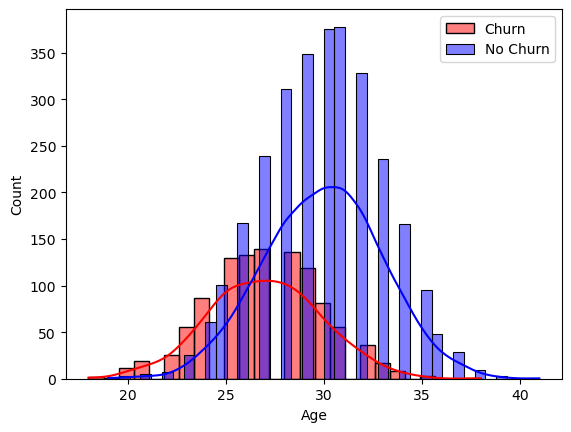

In [13]:
sns.histplot(data[data['Churn'] == 1]['Age'],
             color='red', label='Churn', kde=True)
sns.histplot(data[data['Churn'] == 0]['Age'],
             color='blue', label='No Churn', kde=True)
plt.legend()
plt.show()

Encontramos que hay una mayor proporcion de cancelalaciones. De manera inicial se sugiere que la edad puede ser un elemento implicado en la cancelacion.


In [14]:
# Se realiza la matriz de correlacion para los datos
correlation_matrix = data.corr()
correlation_matrix

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


In [15]:
# se hace una matriz de correlacion separando los datos por cancelados vs no cancelados 
for churn, group in data.groupby('Churn'):
    print(f"\nCorrelacion para Churn = {churn}:")
    print(group.corr())


Correlacion para Churn = 0:
                                     gender  Near_Location   Partner  \
gender                             1.000000       0.004588 -0.017409   
Near_Location                      0.004588       1.000000 -0.015871   
Partner                           -0.017409      -0.015871  1.000000   
Promo_friends                     -0.002746       0.198554  0.455108   
Phone                             -0.008443      -0.013571  0.021220   
Contract_period                   -0.002893       0.130844  0.294745   
Group_visits                       0.015434       0.147798 -0.011820   
Age                                0.014745       0.006876 -0.011818   
Avg_additional_charges_total      -0.013551       0.023125 -0.006994   
Month_to_end_contract             -0.005047       0.122438  0.280882   
Lifetime                           0.019150       0.022296 -0.013123   
Avg_class_frequency_total          0.018719       0.001698 -0.019247   
Avg_class_frequency_current_month  

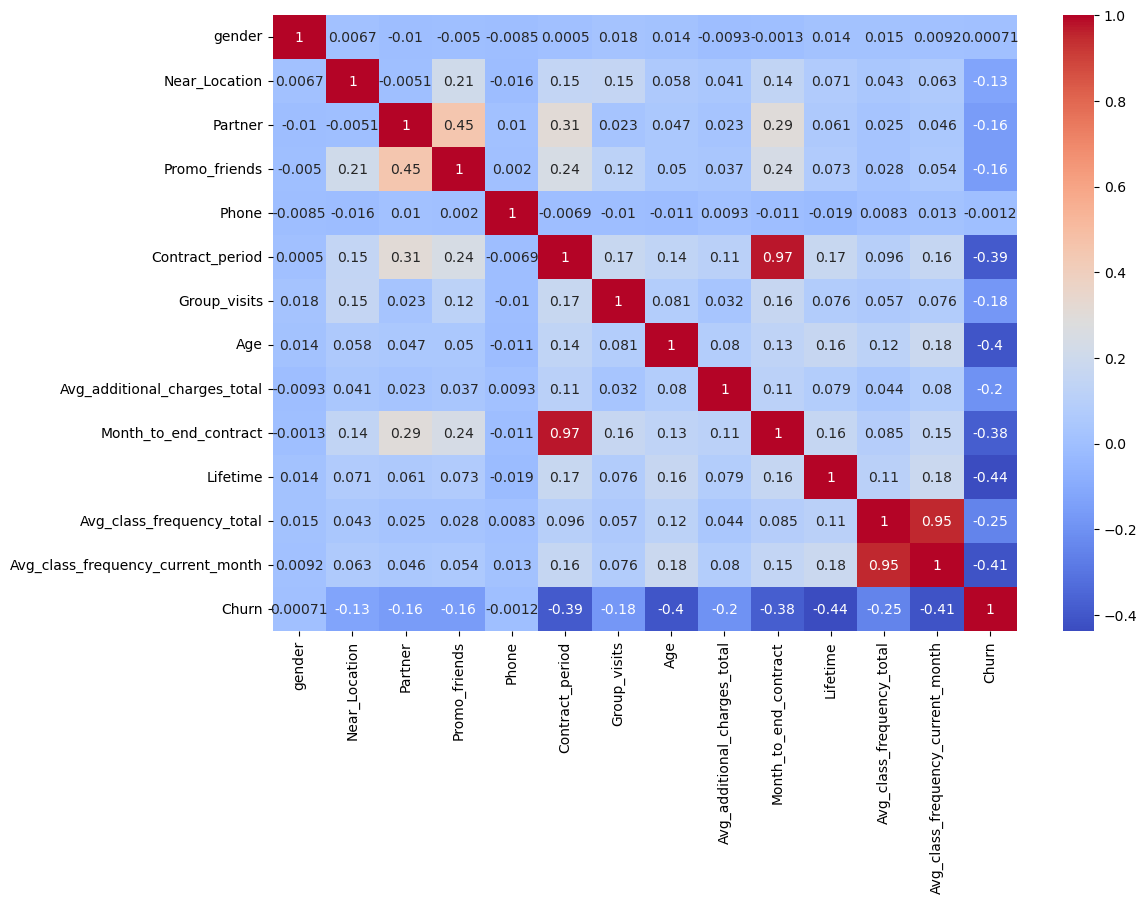

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Se cargan librerias, se hacen los preliminares y se generan los modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split


# Definir las características (X) y la variable objetivo (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Realizar predicciones con el modelo de regresión logística
y_pred_logistic = logistic_model.predict(X_val)

# Evaluar el modelo de regresión logística
accuracy_logistic = accuracy_score(y_val, y_pred_logistic)
precision_logistic = precision_score(y_val, y_pred_logistic)
recall_logistic = recall_score(y_val, y_pred_logistic)

print(f'Logistic Regression - Accuracy: {accuracy_logistic:.2f}, Precision: {precision_logistic:.2f}, Recall: {recall_logistic:.2f}')

# Crear y entrenar el modelo de bosque aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Realizar predicciones con el modelo de bosque aleatorio
y_pred_rf = rf_model.predict(X_val)

# Evaluar el modelo de bosque aleatorio
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}')

Logistic Regression - Accuracy: 0.92, Precision: 0.86, Recall: 0.83
Random Forest - Accuracy: 0.92, Precision: 0.84, Recall: 0.82


#### Se observa que la regresion logistica es ligeramente superior 

In [18]:
# estarandizar datos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_val)

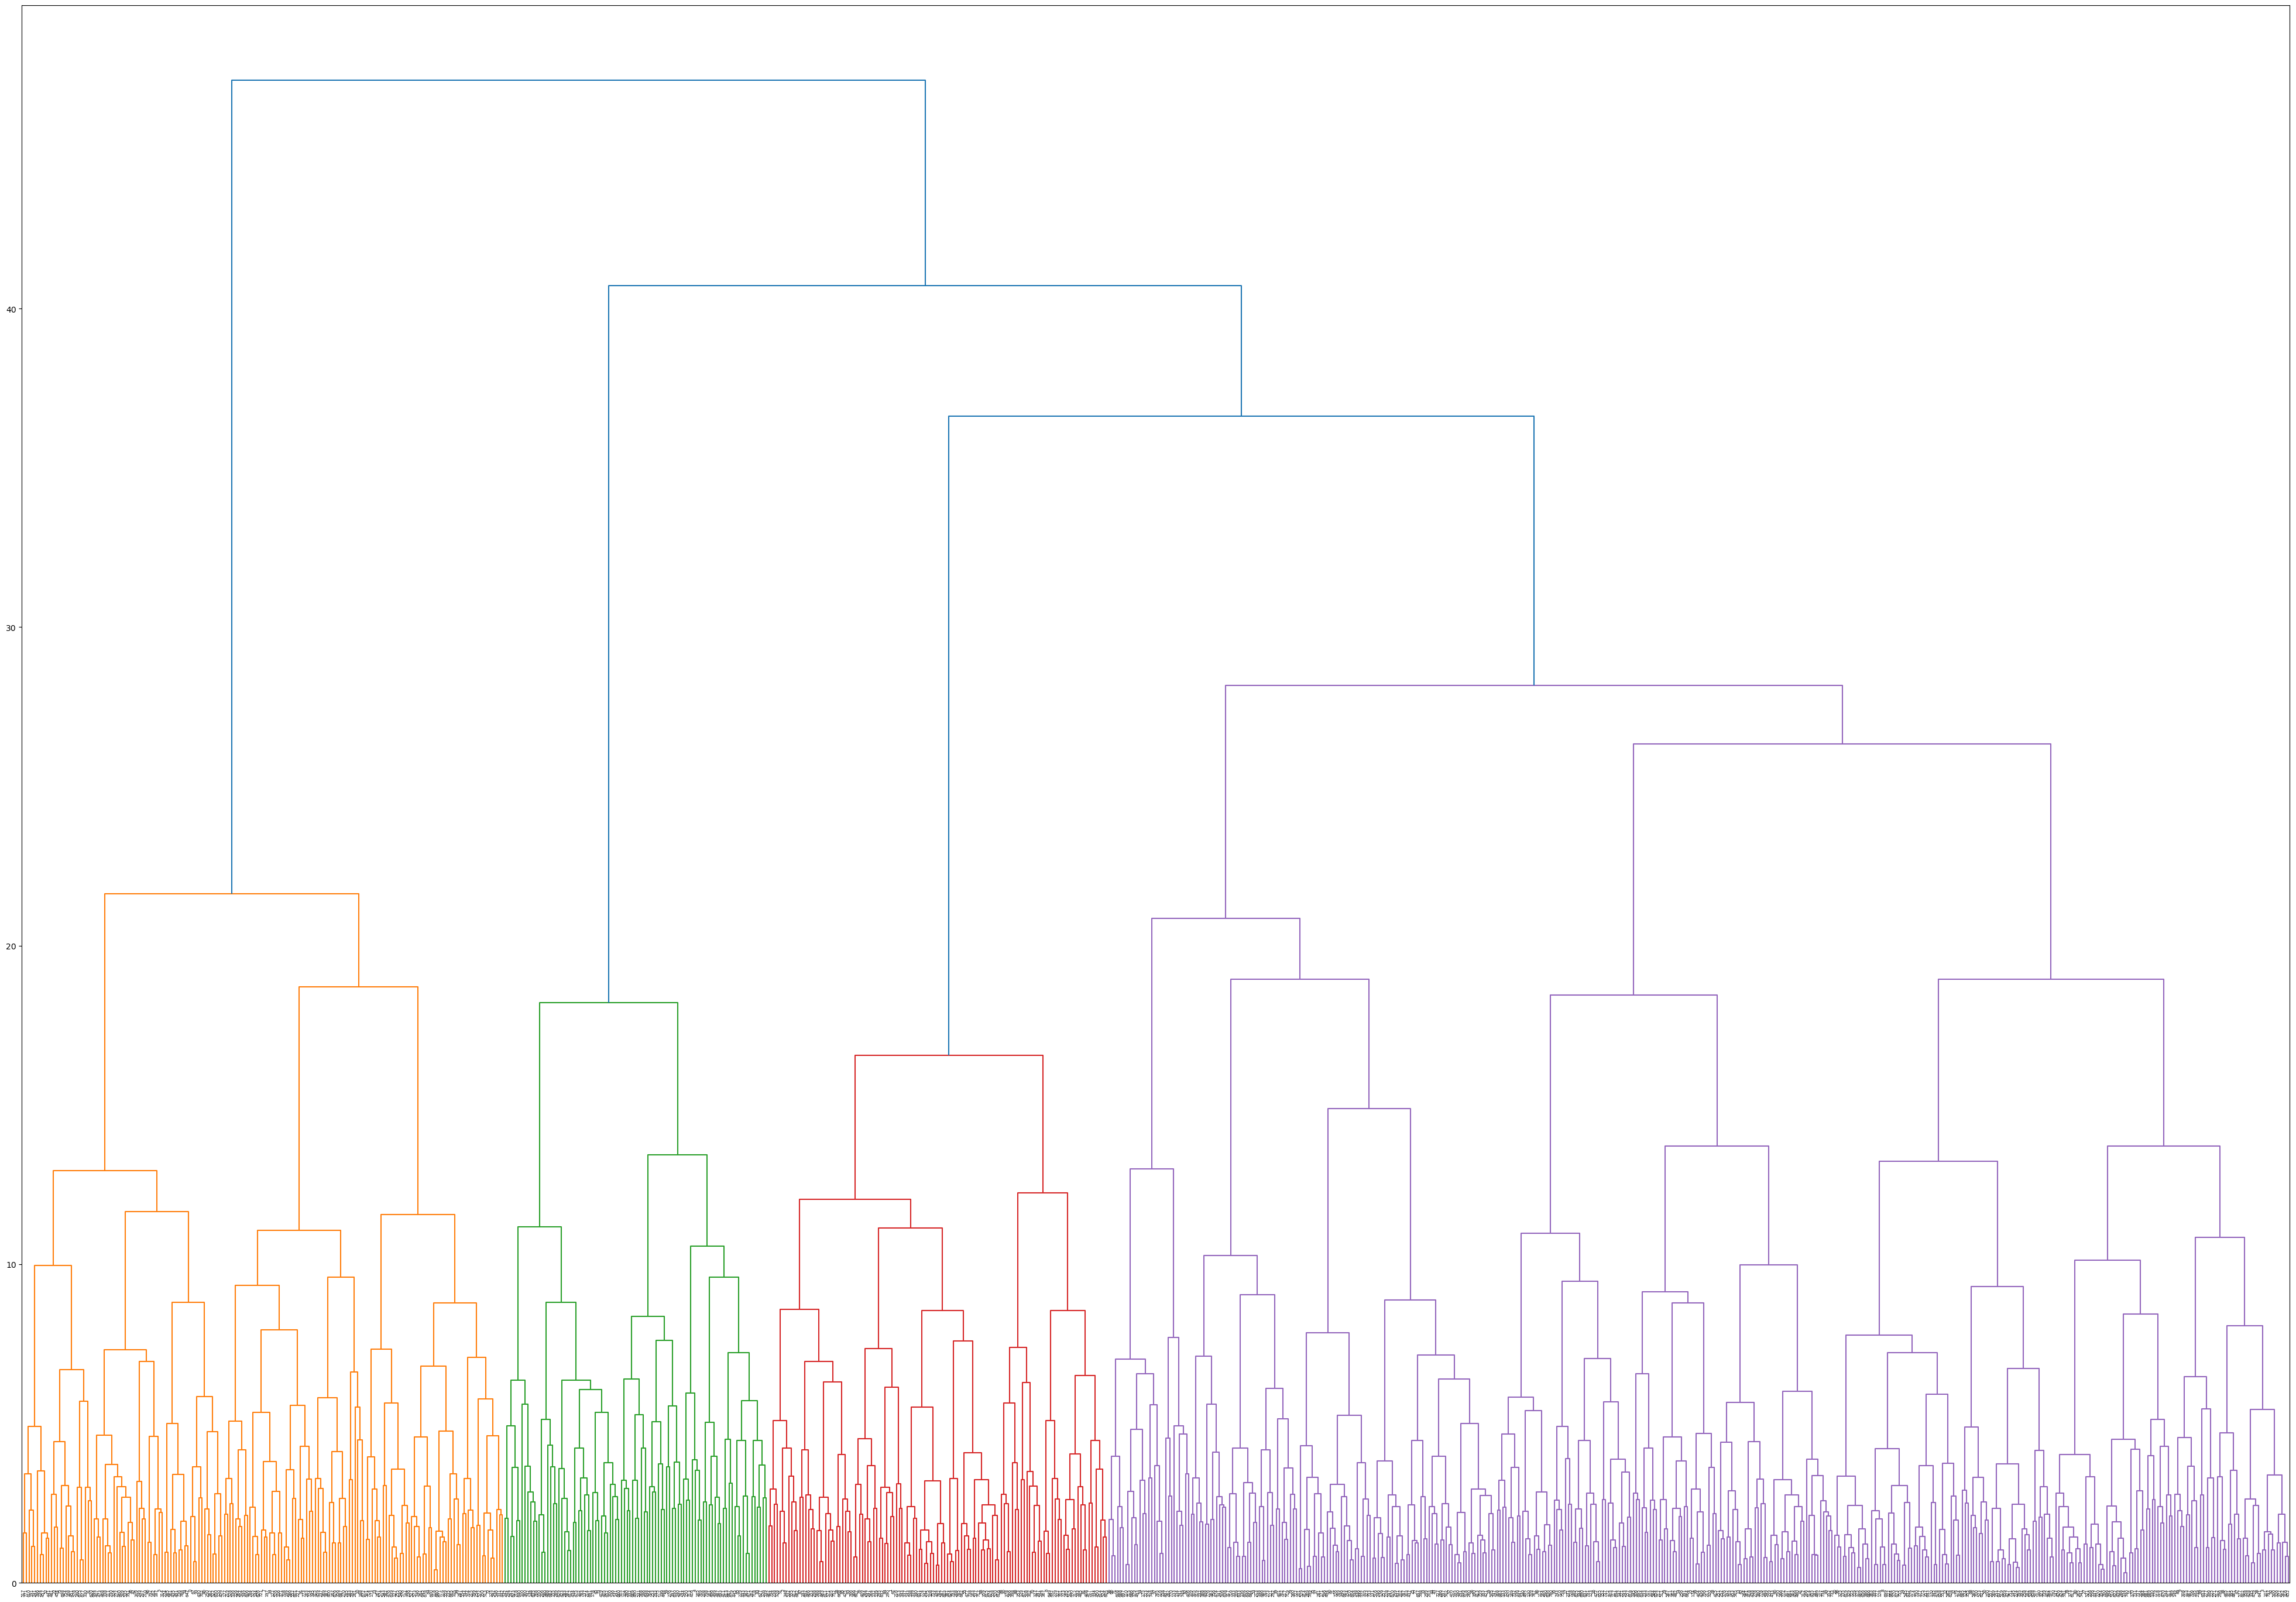

In [19]:
# Generacion de dendrograma

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(50, 35))
dendrogram(linked)
plt.show()

#### Se observa que existen diferentes elementos que podrian estar implicados en la cancelacion de los usuarios.

In [20]:
# k-means Se generan 5 grupos pormedio de;
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters= 5, random_state= 0)

data['k_cluster'] = clusters.fit_predict(X)


In [21]:
# Medias de datos por cluster

data.groupby('k_cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
k_cluster,,,,,,,,,,,,,,
0,0.465986,0.853741,0.513605,0.336735,0.928571,5.772109,0.435374,29.877551,352.178412,5.329932,4.401361,1.991659,1.978845,0.054422
1,0.507292,0.842708,0.490625,0.310417,0.896875,4.740625,0.422917,29.401042,170.592035,4.379167,3.758333,1.875226,1.762253,0.237500
2,0.527665,0.875843,0.508772,0.346829,0.900135,5.368421,0.426451,29.314440,246.249623,4.967611,4.143050,1.923810,1.862351,0.179487
3,0.506048,0.823589,0.486895,0.297379,0.907258,4.160282,0.379032,28.888105,34.231466,3.827621,3.384073,1.847083,1.700854,0.357863
4,0.517275,0.844028,0.459033,0.281343,0.901283,4.315893,0.417572,28.972359,102.702388,3.990128,3.524186,1.848436,1.705247,0.324778


In [22]:
# tasa de cancelacion por cluster

data.groupby('k_cluster')['Churn'].mean()

k_cluster
0    0.054422
1    0.237500
2    0.179487
3    0.357863
4    0.324778
Name: Churn, dtype: float64

#### Encontramos que formar 5 grupos de usuario la mayoria de ellos tiene la mismma proporcion de cancelaciones, sin embargo se observa que el grupo 3 tiene una mayor proporcion con respecto a los demas, caso contrario el grupo 0 tiene la menor proporcion de cancelaciones.


#### Se sugiere investigar mas a fondo los elementos que pueden estar implicados en la cancelacion de los usuarios para poder remediar eso y generar retencion de usuarios. 